In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from shared.IRL_analyser import IRL_analyser
from shared.obtain_q import q_analyser
import argparse
from shared.boost_action import polish_index,boost_action
import pingouin
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from shared.overtaking_traj_revised import overtaking_traj_revised

os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use this GPU
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
##analysis setup

num_sub = 47
setup = argparse.ArgumentParser().parse_args([])
setup.from_data = True #data or dqn
setup.full_space = False #full state space
setup.recent_model = False ## use the newest model instead of the best discrete model
setup.max_model = True ## use dqn_max instead of dqn_maxiter
setup.reward_outlier_removal = False
setup.state_only = False
setup.transform_old = False #old transformation method (distance max: 300, min: -20)

if setup.from_data:
    setup.keyword = '35qb120_boost_take' #IRL ouput name
else:
    setup.keyword = '35qbLow50120_512_take' #IRL ouput name
    
setup.starting_number = 2 #starting number of IRL output
setup.num_sim = 1 #number of IRL iterations saved
setup.gpu_fraction = 0.15 #fraction of GPU to use
setup.num_sub = num_sub #number of subjects

sub_list = np.arange(num_sub)
num_sub = len(sub_list)

starting_sub = 302
setup.sub_list = sub_list + starting_sub

min_speed = 20
max_speed = 120
speed_step = 10

In [3]:
##load data

df = pd.read_csv('behavior_v2/survey_data/data_survey.csv')
gender_str = np.array(df.sex)
gender = np.array([gender_str[x] == 'Male' for x in range(len(gender_str))])+1 #1=female, 2=male
age = np.array(df.age_month)
BIS = np.array(df.bis_total)

BIS_cog = np.array(df.bis_l2_cog_imp)
BIS_motor = np.array(df.bis_l2_motor_imp)
BIS_nonplan = np.array(df.bis_l2_nonplanning_imp)

df_ddt = pd.read_csv('behavior_v2/survey_data/data_ddt.csv')
DDT = np.array(df_ddt.ddt_logk)

df_gng = pd.read_csv('behavior_v2/survey_data/data_gng.csv')
gng_error = np.array(df_gng.error_rate)
gng_rt = np.array(df_gng.go_rt)

In [4]:
##load IRL data

num_action = 5
pred_match_list = np.zeros((num_action+1,num_sub,3)) #action*sub*proportion/sample
window_match_list = pred_match_list.copy()

yList = []
obs_list = []
action_list = []

for iSub in range(num_sub):
    # sub_id = 'sub'+str(iSub)
    
    sub_id = 'sub'+str(sub_list[iSub] + starting_sub)
    print(sub_id)

    setup.target_sub = sub_id

    ##IRL analyser
    analyser = IRL_analyser(setup)
    original_observations, expert_actions = analyser.load_trajectory()

    if analyser.setup.full_space:
        original_observations,expert_actions = analyser.obtain_full_space()

    expert_observations = analyser.model_prediction(original_observations,expert_actions)

    y = np.squeeze(analyser.raw_reward)

    yList.append(y)    
    obs_list.append(original_observations)
    action_list.append(expert_actions)

sub302
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 8600 batch size 8600
polished action0: 4 out of 512
polished action2: 5 out of 516
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub302_35qb120_boost_take2/best_acc_model.ckpt
deleted 2 inf rewards
201 outliers detected
sub303
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 10100 batch size 10100
polished action0: 2 out of 370
polished action2: 3 out of 365
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub303_35qb120_boost_take2/be

no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub317_35qb120_boost_take2/best_acc_model.ckpt
deleted 23 inf rewards
209 outliers detected
sub318
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 9800 batch size 9800
polished action0: 4 out of 274
polished action2: 0 out of 268
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub318_35qb120_boost_take2/best_acc_model.ckpt
deleted 14 inf rewards
225 outliers detected
sub319
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 9400 batch size 9400
polished action0: 0 out of 323
polished a

fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub333_35qb120_boost_take2/best_acc_model.ckpt
deleted 0 inf rewards
119 outliers detected
sub334
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 8300 batch size 8300
polished action0: 7 out of 390
polished action2: 0 out of 393
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub334_35qb120_boost_take2/best_acc_model.ckpt
deleted 0 inf rewards
185 outliers detected
sub335
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 9500 batch size 9500
polished action0: 5 out of 238
polished action2: 3 out of 243
state_only Fa

In [6]:
normalize_reward = True
or_yList = yList.copy()
###standardize
if normalize_reward:
    scaled_yList = []
    
    for iScale in range(num_sub):
        target_data = or_yList[iScale][~np.isinf(or_yList[iScale])][:,None]
        scaler = preprocessing.StandardScaler().fit(target_data)
        y_scaled = np.squeeze(scaler.transform(target_data)) #standardize
        # y_scaled = np.squeeze(preprocessing.normalize(target_data, norm='l2')) #normalize
        
        inf_index = np.squeeze(np.argwhere(np.isinf(or_yList[iScale])))
        y_scaled_inf = np.empty(len(or_yList[iScale]), dtype = y_scaled.dtype)
        y_scaled_inf[inf_index] = float("inf")
        y_scaled_inf[np.isin(np.arange(len(y_scaled_inf)), inf_index, invert=True)] = y_scaled
        
        scaled_yList.append(y_scaled_inf)
        
        # print(np.mean(y_scaled))

    yList = scaled_yList.copy()

In [7]:
## data processing
outlier_removal = False
winsorize = False
outlier_thres = 5 #z-score outlier
n_out = 0
n_sample = 0
for iSub in range(num_sub):
    targetY = yList[iSub]
    n_out+=np.sum(abs(targetY)>outlier_thres)
    n_sample+=len(targetY)
    if winsorize:
        yList[iSub][abs(targetY)>outlier_thres] = outlier_thres
print("n_outlier",n_out,"out of",n_sample,"prop",n_out/n_sample)

n_outlier 2244 out of 439835 prop 0.005101913217456546


In [8]:
##moment of crash

traj_length = 16

traj_list_full = []
traj_obs_full = []
traj_action_full = []

crash_index_full = []

for iSub in range(num_sub):
    sub_id = 'sub'+str(sub_list[iSub] + starting_sub)
    crash_loc = np.load('traj_from_data_v2/' + sub_id +'/crash_loc.npy')
    num_crash = int(np.sum(crash_loc))
    crash_index = np.sort(np.argsort(crash_loc)[-num_crash:])
    reward_list = yList[iSub]
    target_obs = obs_list[iSub]
    target_action = action_list[iSub]
    
    crash_count = 0
    for iCrash in range(num_crash):
        reward_traj = reward_list[crash_index[iCrash]-traj_length+1:crash_index[iCrash]+1]
        obs_traj = target_obs[crash_index[iCrash]-traj_length+1:crash_index[iCrash]+1,:][None,:,:]
        action_traj = target_action[crash_index[iCrash]-traj_length+1:crash_index[iCrash]+1]
        
        if crash_count == 0:
            reward_traj_list = reward_traj
            obs_traj_list = obs_traj
            action_traj_list = action_traj
            crash_count+=1
        else:
            reward_traj_list = np.vstack((reward_traj_list,reward_traj))
            obs_traj_list = np.vstack((obs_traj_list,obs_traj))
            action_traj_list = np.vstack((action_traj_list,action_traj))
            
    traj_list_full.append(reward_traj_list)
    traj_obs_full.append(obs_traj_list)
    traj_action_full.append(action_traj_list)
    crash_index_full.append(crash_index)

In [10]:
traj_length_over = 21
after_over_length = 5 #steps after overtaking
crash_length = 10 #steps before a crash; default = 10 (2sec)
only_actions = True #only include states after certain actions
forward_filter = True #only include states with no backside cars before overtaking: more precise definition of overtaking

target_actions = [0,2] #put any combination of two actions (or two same actions)
#action 0,2: lane changing, action 1: no-op, action 3,4: acc,dec

changing_threshold = np.array([[0,2]]) #base [0,2]: step-distance between target actions and overtaking

overtake_distance_threshold = [0,0.435] # back distance range that determines overtaking: one car length [0,0.1]
far_back_threshold = 0.543 #far enough back distance: 125/5 distance = 0.543 -> results are not different from 0.99 threshold (no car behind)

mean_traj_list, over_list_full,lane_changing_freq, over_freq,over_obs_full,over_action_full = overtaking_traj_revised(changing_threshold,overtake_distance_threshold,traj_length_over,after_over_length,only_actions,target_actions,outlier_removal,far_back_threshold,num_sub,yList,obs_list,action_list,forward_filter,crash_index_full,crash_length)
print("overtaking freq",np.sum([len(over_list_full[x]) for x in range(num_sub)]))

#correlation with BIS by steps in traj
for iTraj in range(traj_length_over):
    bf_corr_bis = pingouin.corr(mean_traj_list[iTraj],BIS, method='pearson').round(3)
    #print([float(bf_corr_bis.r.pearson),float(bf_corr_bis['p-val'].pearson),float(bf_corr_bis.BF10.pearson)], iTraj)

overtaking freq 8890


In [14]:
##correlation between BIS and reward
traj_range = [14] #[14,15,16]
print(pingouin.corr(np.mean(mean_traj_list[traj_range,:],axis=0),BIS, method='pearson').round(3))

traj_range = [6,7,8,9]
print(pingouin.corr(np.mean(mean_traj_list[traj_range,:],axis=0),BIS, method='pearson').round(3))

          n      r        CI95%  p-val   BF10  power
pearson  47  0.384  [0.11, 0.6]  0.008  5.644  0.772
          n      r        CI95%  p-val    BF10  power
pearson  47  0.458  [0.2, 0.66]  0.001  29.344  0.912


In [15]:
##Identify BIS quartiles
quartile_threshold = 0.25
threshold = int(np.floor(len(BIS) * quartile_threshold))

low_index = BIS <= np.sort(BIS)[threshold-1]
high_index = BIS >= np.sort(BIS)[-threshold]

print("low",np.sum(low_index),"high",np.sum(high_index))

low 11 high 11


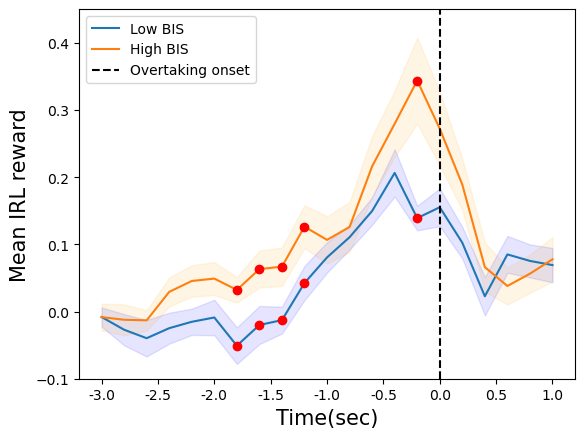

In [16]:
###ovetaking trajectory

target_points = np.array([6,7,8,9,14])

x = np.arange(traj_length_over) * 0.2

mean_score_low = np.mean(mean_traj_list[:,low_index],axis = 1)
ci_score_low = np.std(mean_traj_list[:,low_index],axis = 1)/np.sqrt(np.sum(low_index))
mean_score_high = np.mean(mean_traj_list[:,high_index],axis = 1)
ci_score_high = np.std(mean_traj_list[:,high_index],axis = 1)/np.sqrt(np.sum(high_index))

plt.plot(x,mean_score_low,zorder=1)
plt.fill_between(x,mean_score_low-ci_score_low, mean_score_low+ci_score_low, color='b', alpha=.1)

mean_score_high = np.mean(mean_traj_list[:,high_index],axis = 1)
ci_score_high = np.std(mean_traj_list[:,high_index],axis = 1)/np.sqrt(np.sum(high_index))

plt.plot(x,mean_score_high,zorder=1)
plt.fill_between(x,mean_score_high-ci_score_high, mean_score_high+ci_score_high, color='orange', alpha=.1)

plt.axvline(x=x[-after_over_length-1],color='k',linestyle = 'dashed',label='overtake')
plt.xticks(np.arange(0, x[-1]+0.1, step=0.4))
plt.legend(['Low BIS', 'High BIS','Overtaking onset'])
plt.ylabel('Mean IRL reward',fontsize=15)
plt.xlabel('Time(sec)',fontsize=15)
plt.xticks(np.arange(0, 4.1, step=0.5),np.arange(-3,1.1,step=0.5))
plt.ylim([-0.1,0.45])

plt.scatter(target_points*0.2, mean_score_high[target_points],color = 'red',zorder=2)
plt.scatter(target_points*0.2, mean_score_low[target_points],color = 'red',zorder=2)

Text(0.5, 0, 'Time(sec)')

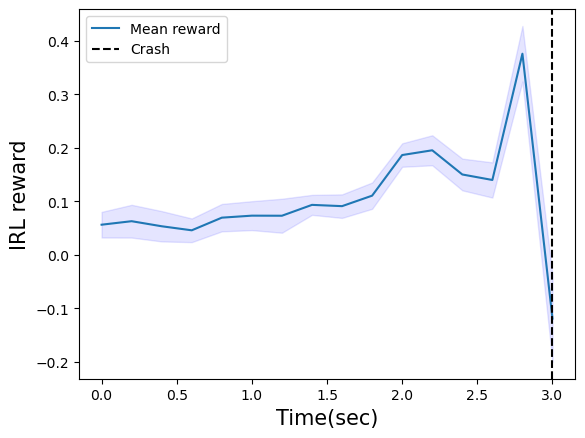

In [17]:
#crash traj
mean_traj_list = np.zeros((traj_length,num_sub))

for iSub in range(num_sub):
    if outlier_removal:
        inf_index = np.sum(traj_list_full[iSub]>outlier_thres,axis=1)>0
    else:
        inf_index = np.sum(np.isinf(traj_list_full[iSub]),axis=1)>0

    # inf_index = np.sum(np.isinf(traj_list_full[iSub]),axis=1)>0
    target_traj = traj_list_full[iSub][~inf_index,:]
    
    mean_traj_list[:,iSub] = np.mean(target_traj,axis=0)
    # plt.plot(np.mean(target_traj,axis=0))
    # plt.title('sub'+str(sub_list[iSub] + starting_sub))

mean_score = np.mean(mean_traj_list,axis = 1)
ci_score = np.std(mean_traj_list,axis = 1)/np.sqrt(num_sub)

x = np.arange(traj_length) * 0.2
plt.plot(x,mean_score)
plt.fill_between(x,mean_score-ci_score, mean_score+ci_score, color='b', alpha=.1)

plt.axvline(x=x[-1],color='k',linestyle = 'dashed',label='crash')
plt.xticks(np.arange(0, 3.1, step=0.5))
plt.legend(['Mean reward','Crash'])
plt.ylabel('IRL reward',fontsize=15)
plt.xlabel('Time(sec)',fontsize=15)

(-0.8, 1.8)

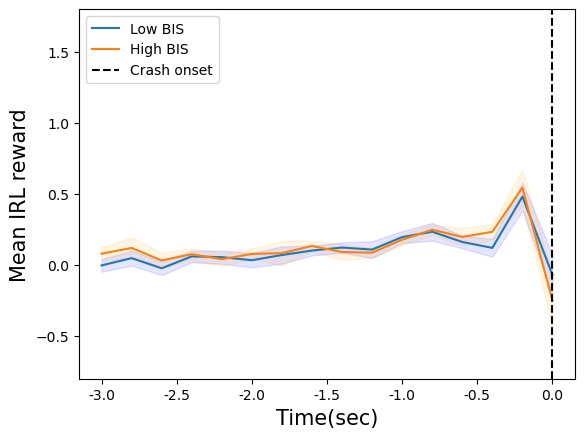

In [18]:
##crash traj by BIS groups

x = np.arange(traj_length) * 0.2

mean_score_low = np.mean(mean_traj_list[:,low_index],axis = 1)
ci_score_low = np.std(mean_traj_list[:,low_index],axis = 1)/np.sqrt(np.sum(low_index))

plt.plot(x,mean_score_low)
plt.fill_between(x,mean_score_low-ci_score_low, mean_score_low+ci_score_low, color='b', alpha=.1)

mean_score_high = np.mean(mean_traj_list[:,high_index],axis = 1)
ci_score_high = np.std(mean_traj_list[:,high_index],axis = 1)/np.sqrt(np.sum(high_index))

plt.plot(x,mean_score_high)
plt.fill_between(x,mean_score_high-ci_score_high, mean_score_high+ci_score_high, color='orange', alpha=.1)

plt.axvline(x=x[-1],color='k',linestyle = 'dashed',label='crash')
plt.xticks(np.arange(0, 3.1, step=0.5),np.arange(-3,0.1,step=0.5))
plt.legend(['Low BIS', 'High BIS','Crash onset'])
plt.ylabel('Mean IRL reward',fontsize=15)
plt.xlabel('Time(sec)',fontsize=15)

plt.ylim([-0.8,1.8])